In [ ]:
# All about data cleaning

### Lesson 18: Data Cleaning Introduction

In [2]:
# Step 1: Handling missing data with Pandas
import numpy as np
import pandas as pd 

In [3]:
# Valid or invalid vals, customer 170 yrs old

In [4]:
#Panda utlity functions
# To identify missing or null value
pd.isnull(np.nan) # Preferable to use isNull

True

In [5]:
pd.isnull(None)

True

In [6]:
pd.isna(np.nan) # same as isnull

True

In [7]:
pd.isna(None)

True

In [8]:
pd.notna(np.nan)

False

In [9]:
pd.notnull(3)

True

In [10]:
# Works with entire series
pd.isnull(pd.Series([1, np.nan, 7])) #which vals are null

0    False
1     True
2    False
dtype: bool

In [11]:
 pd.isnull(pd.DataFrame({
     'Column A': [1, np.nan, 7],
     'Column B': [np.nan, 2, 3],
     'Column C': [np.nan, 2, np.nan]
 }))

,Column A,Column B,Column C
0,False,True,True
1,True,False,False
2,False,False,True


In [12]:
# Filtering missing data
s = pd.Series([1,2,3,np.nan,np.nan,4])

In [13]:
pd.notnull(s)

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [14]:
pd.notnull(s).count() #count

6

In [15]:
pd.notnull(s).sum() #sumofallnotnull

4

In [16]:
pd.isnull(s).sum()

2

In [17]:
s[pd.notnull(s)] #give me all the vals that are not null

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

In [18]:
s.isnull()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [19]:
s.notnull()

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [20]:
s[s.notnull()]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

In [21]:
s.dropna() # excluding missing vals from series or dataframe

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

In [22]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [23]:
import pandas as pd
import numpy as np

s = pd.Series(['a', 3, np.nan, 1, np.nan])

print(s.notnull().sum())

3


### Lesson 19: Data Cleaning with DataFrames

In [24]:
df = pd.DataFrame({
    'Column A': [1, np.nan, 30, np.nan],
    'Column B': [2, 8, 31, np.nan],
    'Column C': [np.nan, 9, 32, 100],
    'Column D': [5, 8, 34, 110],
})

In [25]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Column A  2 non-null      float64
 1   Column B  3 non-null      float64
 2   Column C  3 non-null      float64
 3   Column D  4 non-null      int64  
dtypes: float64(3), int64(1)
memory usage: 256.0 bytes


In [27]:
df.isnull()

,Column A,Column B,Column C,Column D
0,False,False,True,False
1,True,False,False,False
2,False,False,False,False
3,True,True,False,False


In [28]:
df.isnull().sum()

Column A    2
Column B    1
Column C    1
Column D    0
dtype: int64

In [29]:
df.dropna() # different: drops any row that has at leaast 1 null value.
# strict

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


In [30]:
# Change change one above to keep only col that has no null vals
df.dropna(axis=1)

,Column D
0,5
1,8
2,34
3,110


In [ ]:
# Subsets: Only delete rows which have 3 valid vals for example 

In [31]:
df2 = pd.DataFrame({
    'Column A': [1, np.nan, 30],
    'Column B': [2, np.nan, 31],
    'Column C': [np.nan, np.nan, 100]
})

In [32]:
df2

,Column A,Column B,Column C
0,1.0,2.0,NaN
1,NaN,NaN,NaN
2,30.0,31.0,100.0


In [33]:
df.dropna(how='all') # Drop cols that have all vals as null 

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [34]:
df.dropna(how='any') # any vals as null

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


In [35]:
# USe thresh to indicate a threshold (min number) of non-null vals for the row/col to be kept
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [36]:
df.dropna(thresh=3)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34


In [38]:
df.dropna(thresh=3, axis='columns')

,Column B,Column C,Column D
0,2.0,NaN,5
1,8.0,9.0,8
2,31.0,32.0,34
3,NaN,100.0,110


In [39]:
# Filling null values

In [40]:
s

0      a
1      3
2    NaN
3      1
4    NaN
dtype: object

In [41]:
s.fillna(0) # Fill na's with number 0

0    a
1    3
2    0
3    1
4    0
dtype: object

In [42]:
s.fillna(s.mean()) # Fill with the mean

TypeError: can only concatenate str (not "int") to str

In [43]:
s # Doesnt alter the series, immuatble

0      a
1      3
2    NaN
3      1
4    NaN
dtype: object

In [44]:
# Filling nulls with contiguous vals

In [45]:
s.fillna(method='ffill') # forward fill

0    a
1    3
2    3
3    1
4    1
dtype: object

In [46]:
s.fillna(method='bfill') # backward fill

0      a
1      3
2      1
3      1
4    NaN
dtype: object

In [47]:
# If you have null vals in beginning or end, youll end up with null

In [48]:
df.fillna(method='ffill', axis=0)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,1.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,30.0,31.0,100.0,110


In [49]:
df.fillna(method='ffill', axis=1)

,Column A,Column B,Column C,Column D
0,1.0,2.0,2.0,5.0
1,NaN,8.0,9.0,8.0
2,30.0,31.0,32.0,34.0
3,NaN,NaN,100.0,110.0


In [50]:
# Filling null vals on DataFrams

In [51]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [52]:
df.fillna({'Column A': 0, 'Column B': 99, 'Column C': df['Column C'].mean()})

,Column A,Column B,Column C,Column D
0,1.0,2.0,47.0,5
1,0.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,0.0,99.0,100.0,110


In [53]:
df.fillna(method='ffill', axis=0)
# down Direction for filling

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,1.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,30.0,31.0,100.0,110


In [54]:
df.fillna(method='ffill', axis=1) 
# -------------------------> Direction for filling

,Column A,Column B,Column C,Column D
0,1.0,2.0,2.0,5.0
1,NaN,8.0,9.0,8.0
2,30.0,31.0,32.0,34.0
3,NaN,NaN,100.0,110.0


In [55]:
#  any
pd.Series([True, False, False]).any() # if any vals are valid

True

In [56]:
pd.Series([True, False, False]).all() # if all are

False

In [57]:
# Has vals, but they're invalid

df = pd.DataFrame({
    'Sex': ['M', 'F', 'F', 'D', '?'],
    'Age': [29, 30, 24, 290, 25]
})
df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,290
4,?,25


In [58]:
# Finding unique values
df['Sex'].unique()

array(['M', 'F', 'D', '?'], dtype=object)

In [59]:
df['Sex'].value_counts()

F    2
M    1
D    1
?    1
Name: Sex, dtype: int64

In [62]:
df['Sex'].replace('D','F')

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

In [63]:
df['Sex'].replace({'D': 'F', 'N': 'M'})

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

In [64]:
df[df['Age'] > 100]

,Sex,Age
3,D,290


In [65]:
df.loc[df['Age'] > 100, 'Age'] = df.loc[df['Age'] > 100, 'Age'] /10

In [66]:
df # Just divided everything by 10

,Sex,Age
0,M,29.0
1,F,30.0
2,F,24.0
3,D,29.0
4,?,25.0


### Lesson 20: Data Cleaning Duplicates

In [68]:
ambassadors = pd.Series([
    'France',
    'United Kingdom',
    'United Kingdom',
    'Italy',
    'Germany',
    'Germany',
    'Germany',
], index=[
    'Gérard Araud',
    'Kim Darroch',
    'Peter Westmacott',
    'Armando Varricchio',
    'Peter Wittig',
    'Peter Ammon',
    'Klaus Scharioth '
])

In [69]:
ambassadors # only want 1 ambassador per country, fix the thing below

Gérard Araud                  France
Kim Darroch           United Kingdom
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
Peter Ammon                  Germany
Klaus Scharioth              Germany
dtype: object

In [70]:
ambassadors.duplicated() # checks from top

Gérard Araud          False
Kim Darroch           False
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig          False
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In [71]:
ambassadors.duplicated(keep='last') #last isnt considered duplicate

Gérard Araud          False
Kim Darroch            True
Peter Westmacott      False
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth       False
dtype: bool

In [72]:
ambassadors.duplicated(keep=False)

Gérard Araud          False
Kim Darroch            True
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In [75]:
ambassadors.drop_duplicated()

AttributeError: 'Series' object has no attribute 'drop_duplicated'

In [76]:
 players = pd.DataFrame({
    'Name': [
        'Kobe Bryant',
        'LeBron James',
        'Kobe Bryant',
        'Carmelo Anthony',
        'Kobe Bryant',
    ],
    'Pos': [
        'SG',
        'SF',
        'SG',
        'SF',
        'SF'
    ]
})

In [77]:
players

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
2,Kobe Bryant,SG
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [78]:
players.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [79]:
# What's the subset we're going to consider duplicate
players.duplicated(subset=['Name'])

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [80]:
players.drop_duplicates()

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [81]:
players.duplicated(subset=['Name'], keep='last')

0     True
1    False
2     True
3    False
4    False
dtype: bool

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     5 non-null      object 
 1   Age     5 non-null      float64
dtypes: float64(1), object(1)
memory usage: 208.0+ bytes


In [84]:
df = pd.DataFrame({
    'Data': [
        '1987_M_US _1',
        '1990?_M_UK_1',
        '1992_F_US_2',
        '1970?_M_   IT_1',
        '1985_F_I  T_2'
]})

In [85]:
df['Data'].str.split('_') # split the vals at the underscore

0       [1987, M, US , 1]
1       [1990?, M, UK, 1]
2        [1992, F, US, 2]
3    [1970?, M,    IT, 1]
4      [1985, F, I  T, 2]
Name: Data, dtype: object

In [90]:
df= df['Data'].str.split('_', expand=True)# creates dataframe

In [91]:
df.columns = ['Year', 'Sex', 'Country', 'No Children']

In [92]:
df

,Year,Sex,Country,No Children
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [93]:
# many string operations
df['Country'].str.strip()

0      US
1      UK
2      US
3      IT
4    I  T
Name: Country, dtype: object

In [89]:
df

,Data
0,1987_M_US _1
1,1990?_M_UK_1
2,1992_F_US_2
3,1970?_M_ IT_1
4,1985_F_I T_2


In [95]:
df['Year'].str.contains('\?')

0    False
1     True
2    False
3     True
4    False
Name: Year, dtype: bool

In [97]:
df['Country'].str.contains('U')

0     True
1     True
2     True
3    False
4    False
Name: Country, dtype: bool

In [98]:
df['Country'].str.strip()

0      US
1      UK
2      US
3      IT
4    I  T
Name: Country, dtype: object

In [99]:
df['Country'].str.replace(' ', '')

0    US
1    UK
2    US
3    IT
4    IT
Name: Country, dtype: object

In [100]:
# Fixed question mark with regular expression
df['Year'].str.replace(r'(?P<year>\d{4})\?', lambda m: m.group('year'))


<ipython-input-100-7deeb993fb0d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Year'].str.replace(r'(?P<year>\d{4})\?', lambda m: m.group('year'))


0    1987
1    1990
2    1992
3    1970
4    1985
Name: Year, dtype: object

 ### Lesson 21: Data Cleaning and Visualizations

In [101]:
 import matplotlib.pyplot as plt

In [102]:
%matplotlib inline

In [103]:
# Global API

In [104]:
x = np.arange(-10,11)

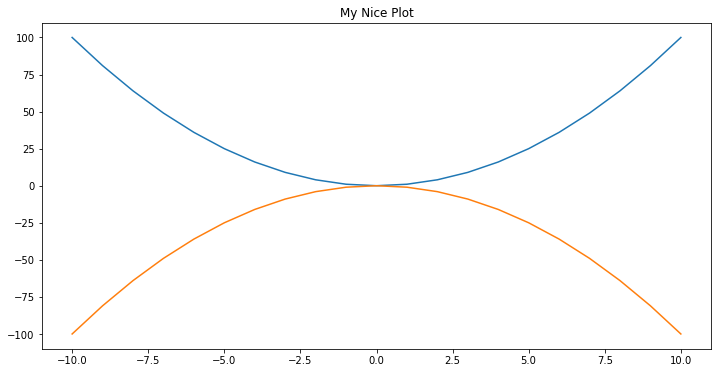

In [106]:
plt.figure(figsize=(12, 6))

plt.title('My Nice Plot')

plt.plot(x, x** 2)
plt.plot(x, -1 * (x ** 2))

Text(0, 0.5, 'X Squared')

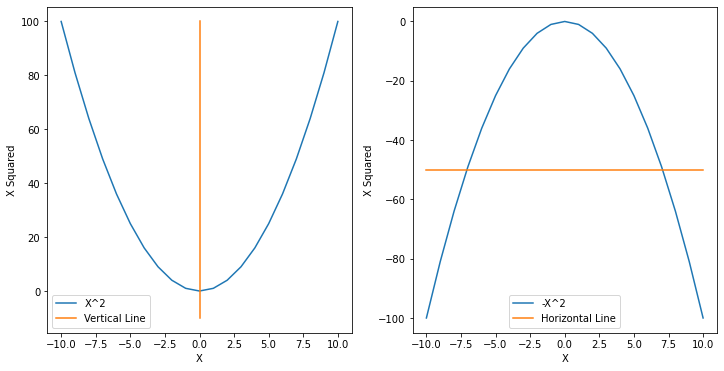

In [107]:
plt.figure(figsize=(12, 6))
plt.title('My Nice Plot')

plt.subplot(1, 2, 1)  # rows, columns, panel selected
plt.plot(x, x ** 2)  # all related to first plot
plt.plot([0, 0, 0], [-10, 0, 100])
plt.legend(['X^2', 'Vertical Line'])
plt.xlabel('X')
plt.ylabel('X Squared')

plt.subplot(1, 2, 2) # now we plot in the second one
plt.plot(x, -1 * (x ** 2))
plt.plot([-10, 0, 10], [-50, -50, -50]) 
plt.legend(['-X^2', 'Horizontal Line'])

plt.xlabel('X')
plt.ylabel('X Squared')

# No OOP way of organizing code

In [ ]:
# OOP WAY
# One entire figure, two axis, references kept 
# Check code on Git
plt.subplot(1, 2, 1) # My figure will have one row, two columns, and I am going to start drawing in the first (left) plot.